In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('MayaUSGC_2013.csv',delimiter =';')



In [33]:
I_2011

,Pred Year,Pred brent 2013,Pred FO 1% 2013,Pred FO 3.5% 2013,Pred Jet 2013,TD 2013,Actual 2013,MD 2013
0,2007,35.00,-5.90,-10.90,11.28,-6.10,-11.3,-7.58
1,2008,78.80,-13.72,-22.00,23.32,-14.56,-11.3,-11.57
2,2009,67.00,-12.46,-17.85,17.69,-10.09,-11.3,-10.06
3,2010,83.75,-8.05,-13.60,17.74,-8.95,-11.3,-9.00
4,2011,105.00,-3.58,-9.82,22.56,-7.52,-11.3,-7.16
5,2012,105.00,-4.80,-10.81,17.04,-4.68,-11.3,-8.62


In [34]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


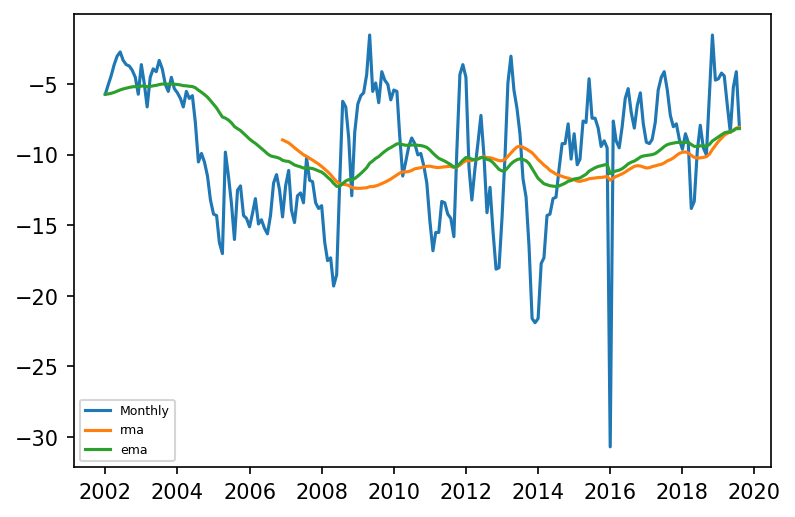

In [35]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Maya USGC"].rolling(window=60).mean()
ema60 = combi["Maya USGC"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Maya USGC"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [36]:
take = 2013

In [37]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
        ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([-10.44164707]),
 array([-11.2198121]),
 array([-11.50415907]),
 array([-9.34673593]),
 array([-9.64507263]),
 array([-10.18757777])]

In [39]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([-9.04666667]),
 array([-10.82]),
 array([-12.37]),
 array([-11.56666667]),
 array([-10.80166667]),
 array([-10.415])]

In [40]:
combi=combi.fillna(0)

X = combi[['FO 3.5%','Jet']]
Y = combi['Maya USGC']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

FO35= I_2011["Pred FO 3.5% 2013"]
Jet= I_2011["Pred Jet 2013"]
linear_MayaU=regr.intercept_+ regr.coef_[0]*FO35 + regr.coef_[1]*Jet
print(linear_MayaU)

Intercept: 
 -0.2448577433473318
Coefficients: 
 [ 0.6099433  -0.04307775]
                            OLS Regression Results                            
Dep. Variable:              Maya USGC   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     180.5
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           4.53e-48
Time:                        08:27:21   Log-Likelihood:                -616.08
No. Observations:                 236   AIC:                             1238.
Df Residuals:                     233   BIC:                             1249.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
nonlinear_MayaU =  0.687587246470687*FO35 + 0.00911247235417213*np.power(Jet,2) + 0.0036123829112612*np.power(FO35,2) - 0.242991626831371*Jet


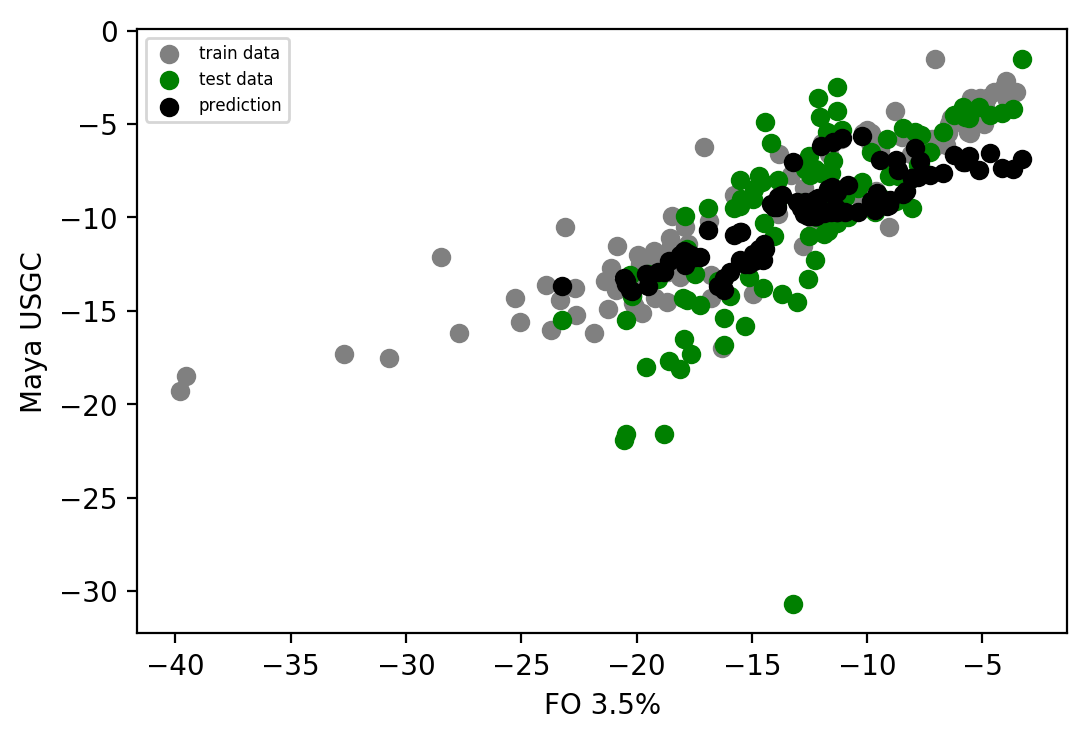

Mean squared error: 0.86
Feature ranking:
Feature FO 3.5% (0.746617)
Feature Jet (0.253383)


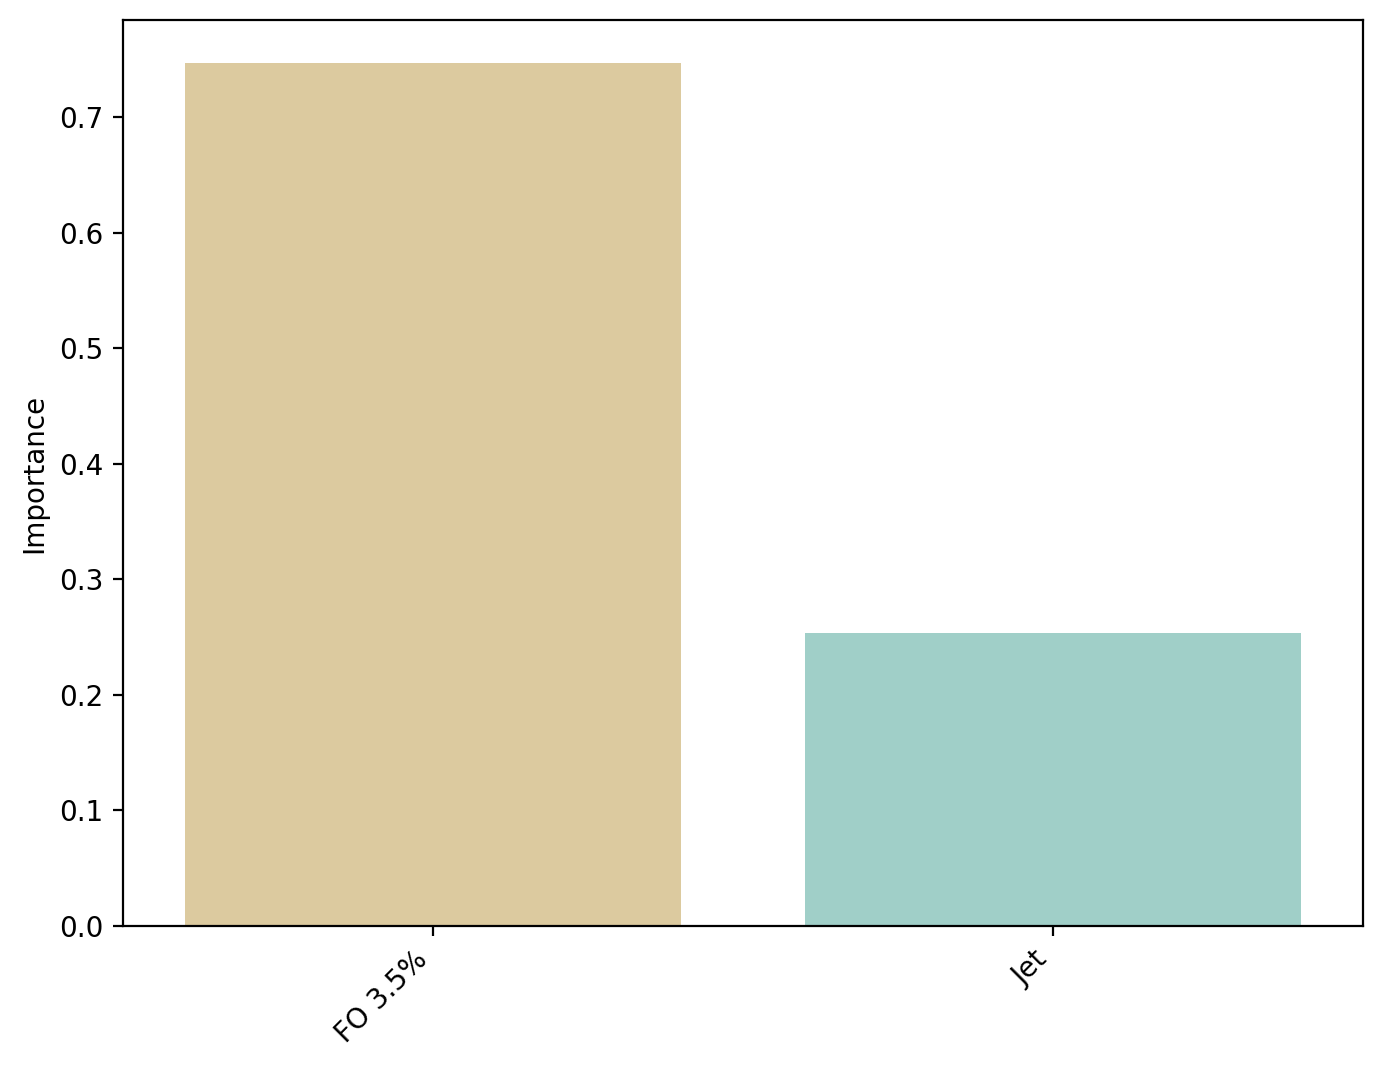

In [42]:
train_combi = combi.iloc[26:131,1:]
test_combi = combi.iloc[132:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["FO 3.5%","Jet"]]
y_train=train_combi["Maya USGC"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["FO 3.5%","Jet"]]
y_test=test_combi["Maya USGC"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["FO 3.5%"],y_train,   color='grey')
plt_test=plt.scatter(x_test["FO 3.5%"],y_test,   color='green')
plt_pred=plt.scatter(x_test["FO 3.5%"], y_pred,  color='black')



plt.xlabel("FO 3.5%")
plt.ylabel("Maya USGC")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [43]:
#data_df = price[['Dated brent','FO 3.5%','FO 1%']]
data_df = pd.concat([FO35, Jet],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

           0
0  -7.126160
1 -14.038106
2 -11.818643
3  -9.180753
4  -8.347176
5  -8.766230


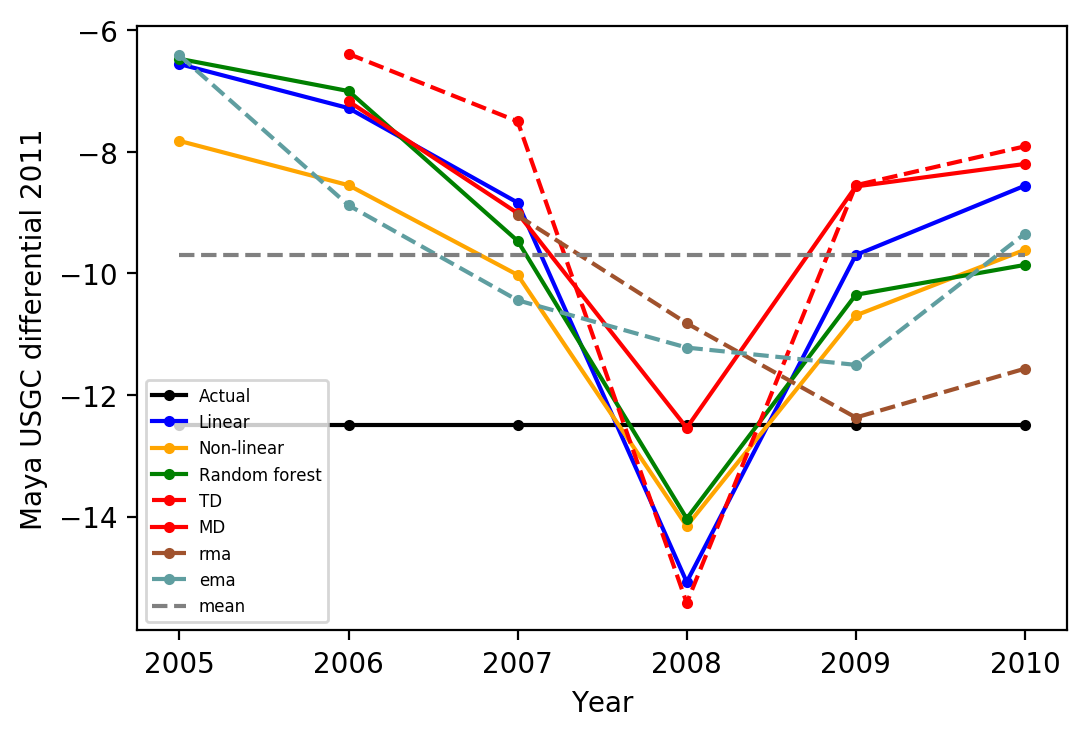

In [17]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_MayaU,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_MayaU,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2011"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-9.7,-9.7],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Maya USGC differential 2011')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))


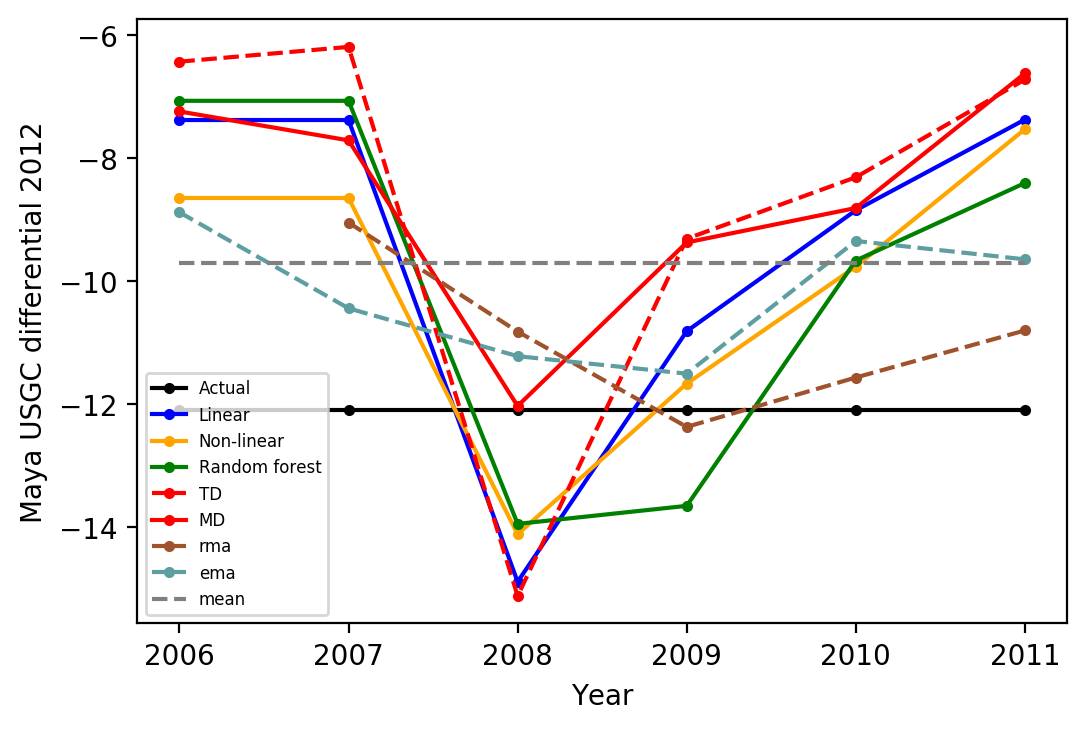

In [31]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_MayaU,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_MayaU,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2012"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-9.7,-9.7],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Maya USGC differential 2012')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))


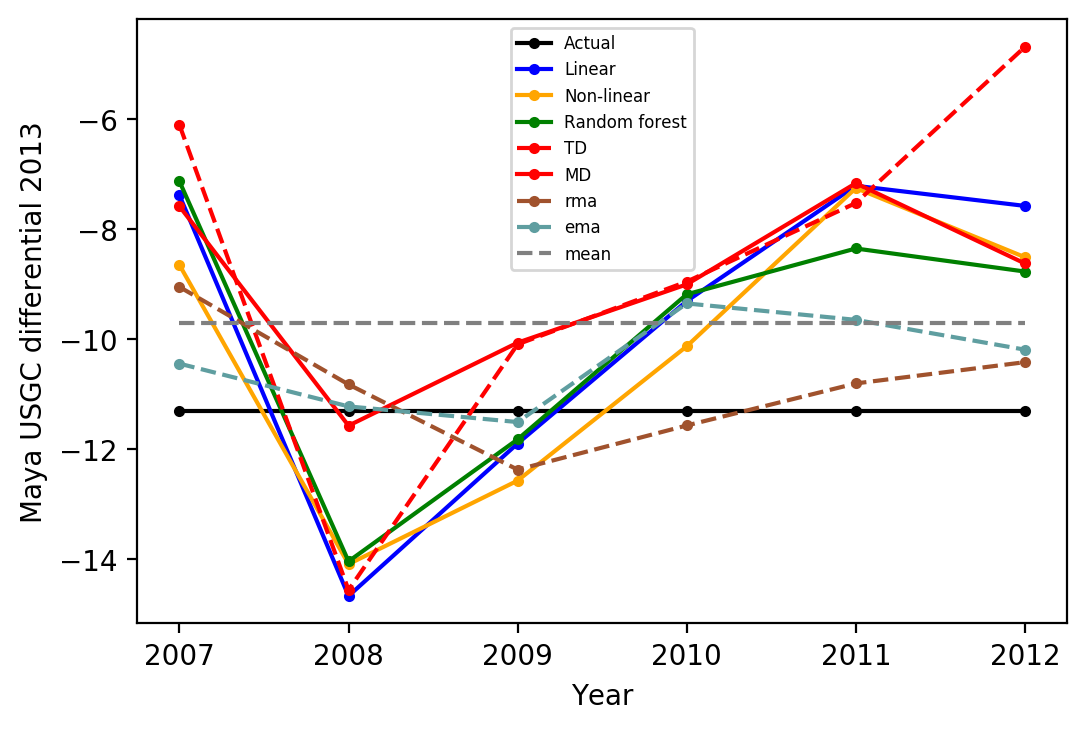

In [44]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2013"],'k.-')
plt.plot(I_2011["Pred Year"],linear_MayaU,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_MayaU,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2013"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2013"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-9.7,-9.7],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Maya USGC differential 2013')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))
